In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1" # export OMP_NUM_THREADS=1
os.environ["OPENBLAS_NUM_THREADS"] = "1" # export OPENBLAS_NUM_THREADS=1
os.environ["MKL_NUM_THREADS"] = "1" # export MKL_NUM_THREADS=1
os.environ["VECLIB_MAXIMUM_THREADS"] = "1" # export VECLIB_MAXIMUM_THREADS=1
os.environ["NUMEXPR_NUM_THREADS"] = "1" # export NUMEXPR_NUM_THREADS=1

In [2]:
from TELF.factorization import NMFk

params = {
    "n_perturbs":36,
    "n_iters":1000,
    "epsilon":0.015,
    "n_jobs":1,
    "init":"nnsvd", 
    "use_gpu":False,
    "save_path":"../../results/", 
    "save_output":True,
    "collect_output":True,
    "predict_k_method":"sill",
    "verbose":True,
    "nmf_verbose":False,
    "transpose":False,
    "sill_thresh":0.8,
    "pruned":True,
    'nmf_method':'nmf_fro_mu', # nmf_fro_mu, nmf_recommender
    "calculate_error":True,
    "predict_k":True,
    "use_consensus_stopping":0,
    "calculate_pac":True,
    "consensus_mat":True,
    "perturb_type":"uniform",
    "perturb_multiprocessing":False,
    "perturb_verbose":False,
    "simple_plot":False
}
Ks = range(1,10,1)
name = "Example_NMFk"
note = "This is an example run of NMFk"

model = NMFk(**params)

n_perturbs: 36
perturb_type: uniform
n_iters: 1000
epsilon: 0.015
init: nnsvd
save_path: ../../results/
save_output: True
use_gpu: False
verbose: True
nmf_verbose: False
perturb_verbose: False
transpose: False
collect_output: True
sill_thresh: 0.8
predict_k: True
predict_k_method: sill
n_jobs: 1
n_nodes: 1
nmf: <function nmf at 0x7f26b8ef9ee0>
nmf_method: nmf_fro_mu
nmf_obj_params: {}
pruned: True
calculate_error: True
consensus_mat: True
use_consensus_stopping: 0
mask: None
calculate_pac: True
simple_plot: False
get_plot_data: False
perturb_multiprocessing: False
lock: <unlocked _thread.lock object at 0x7f26b98426c0>
total_exec_seconds: 0
experiment_name: 
nmf_params: {'niter': 1000, 'use_gpu': False, 'nmf_verbose': False, 'mask': None, 'use_consensus_stopping': 0}


/home/maksim/repositories/T-ELF/TELF/factorization/NMFk.py:603: UserWarning: calculate_pac is True. PAC calculation for large matrices can take long time. For large matrices, instead use consensus_mat=True and calculate_pac=False.
  warnings.warn("calculate_pac is True. PAC calculation for large matrices can take long time. For large matrices, instead use consensus_mat=True and calculate_pac=False.")
/home/maksim/repositories/T-ELF/TELF/factorization/NMFk.py:610: UserWarning: calculate_error is True! Error calculation can make the runtime longer and take up more memory space!
  warnings.warn(


In [3]:
import sys; sys.path.append("../../scripts/")
from generate_X import gen_data,gen_data_sparse

Xsp = gen_data_sparse(shape=[500, 500], density=0.01)["X"]
X = gen_data(R=3, shape=[100, 200])["X"]

/home/maksim/repositories/T-ELF/examples/NMFk/../../scripts/generate_X.py:60: UserWarning: Kruskal's theorem probably won't apply, may not have a unique nCPD.
  warnings.warn("Kruskal's theorem probably won't apply, may not have a unique nCPD.")


In [4]:
%time results = model.fit(X, Ks, name, note)

  0%|          | 0/9 [00:00<?, ?it/s]/home/maksim/miniconda3/envs/TELF/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/maksim/miniconda3/envs/TELF/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/maksim/miniconda3/envs/TELF/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/maksim/repositories/T-ELF/TELF/factorization/NMFk.py:372: RuntimeWarning: [tELF]: Encountered unknown logging metric "pac"
  warnings.warn(f'[tELF]: Encountered unknown logging metric "{key}"', RuntimeWarning)
100%|██████████| 9/9 [00:00<00:00, 15.23it/s]


CPU times: user 12.1 s, sys: 125 ms, total: 12.2 s
Wall time: 12.2 s


In [5]:
results.keys()

dict_keys(['time', 'k_predict', 'W', 'H'])

In [6]:
results["k_predict"]

3

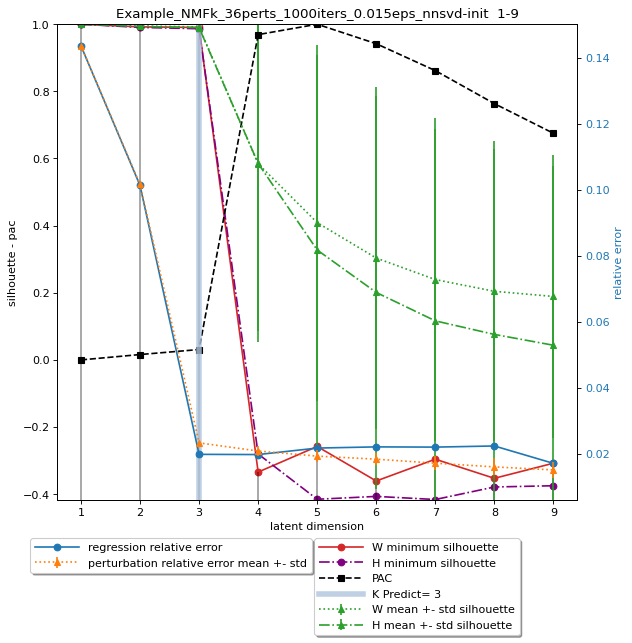

In [7]:
from IPython.display import Image
Image(filename=f'{model.save_path_full}/FINAL_k=1-9.png') 

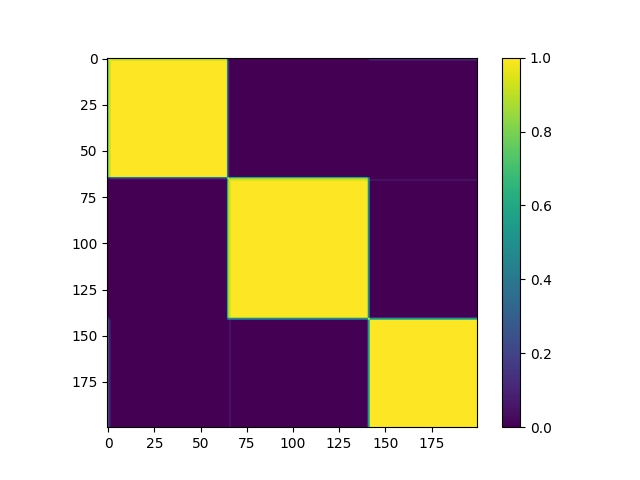

In [8]:
from IPython.display import Image
Image(filename=f'{model.save_path_full}/k_3_con_mat.png') 